In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
df = pd.get_dummies(df, drop_first=True)

In [4]:
df = df.dropna(subset=['Churn'])

In [5]:
X = df.drop(["Churn", "CustomerID"], axis=1)
y = df["Churn"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9775085916499371

Confusion Matrix:
 [[38061     2]
 [ 1981 48123]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     38063
         1.0       1.00      0.96      0.98     50104

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167



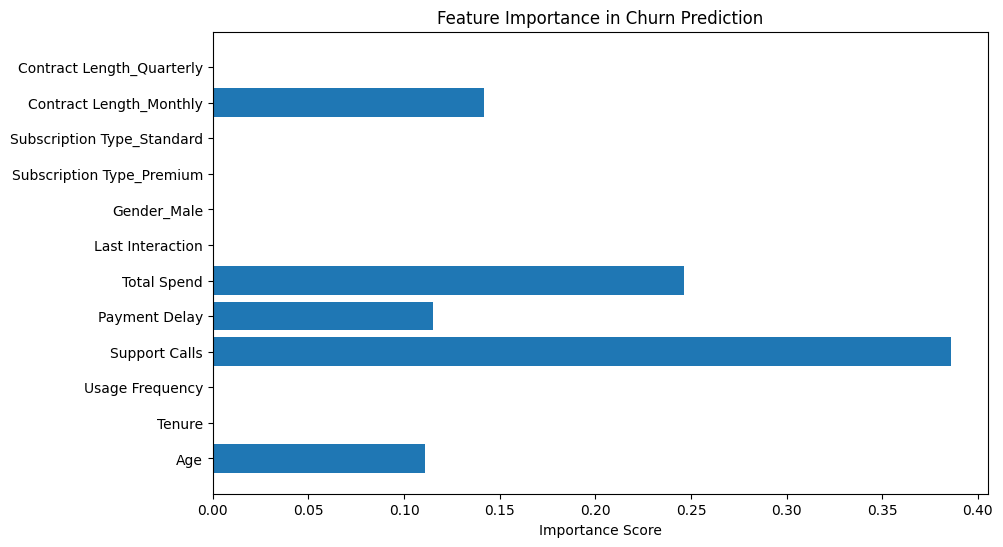

In [10]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance in Churn Prediction")
plt.show()
